In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [37]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(boston.DESCR)

boston_df['Price'] = boston.target

boston_df.head(5)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
newX = boston_df.drop('Price',axis=1)
newY = boston_df['Price'] 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(newX, newY, test_size=0.3, random_state=3)
print(X_train.shape)

(354, 13)


Text(0.5, 1.0, 'Price Histogram')

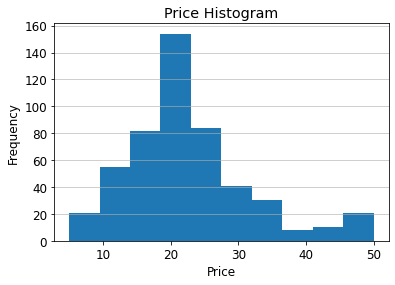

In [39]:
fig = plt.figure()
ax1 = plt.axes()

ax1.hist(newY)

ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Price Histogram')

ordinary linear regression train score: 0.7419034960343789
ordinary linear regression test score: 0.714789526557684


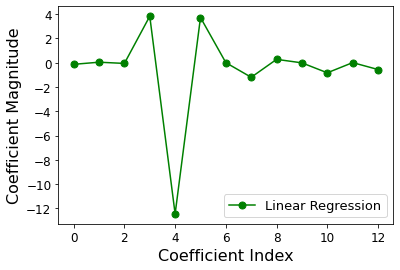

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

print("ordinary linear regression train score:", train_score)
print("ordinary linear regression test score:", test_score)

fig = plt.figure()
ax2 = plt.axes()

ax2.plot(lr.coef_,marker='o',markersize=7,color='green',label='Linear Regression')

ax2.set_xlabel('Coefficient Index',fontsize=16)
ax2.set_ylabel('Coefficient Magnitude',fontsize=16)

ax2.legend(fontsize=13,loc=4)

ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123904


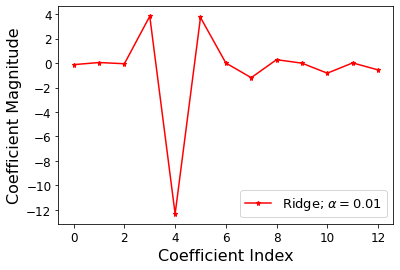

In [41]:
fig = plt.figure()
ax4 = plt.axes()

rr = Ridge(alpha=0.01) 

rr.fit(X_train, y_train)


Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)


print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

ax4.plot(rr.coef_,marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

ax4.set_xlabel('Coefficient Index',fontsize=16)
ax4.set_ylabel('Coefficient Magnitude',fontsize=16)

ax4.legend(fontsize=13,loc=4)

ridge regression train score high alpha: 0.7172809669938277
ridge regression test score high alpha: 0.6805765856921931


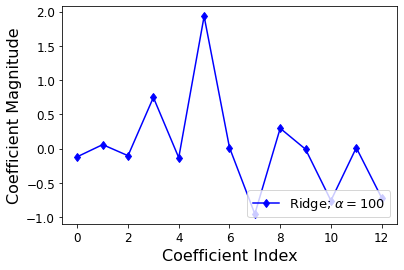

In [42]:
fig = plt.figure()
ax5 = plt.axes()

rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)


print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

ax5.plot(rr100.coef_,marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')

ax5.set_xlabel('Coefficient Index',fontsize=16)
ax5.set_ylabel('Coefficient Magnitude',fontsize=16)

ax5.legend(fontsize=13,loc=4)

There is a minor differnece between the lower and higer alpha Ridge models.
Values for lower alpha is slightly more than the higher alpha model.

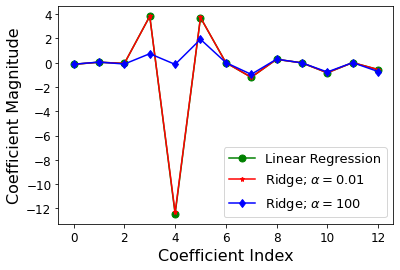

In [44]:
fig = plt.figure()
ax7 = plt.axes()

ax7.plot(lr.coef_,marker='o',markersize=7,color='green',label='Linear Regression')

ax7.plot(rr.coef_, marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$')

ax7.plot(rr100.coef_,marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')

ax7.set_xlabel('Coefficient Index',fontsize=16)
ax7.set_ylabel('Coefficient Magnitude',fontsize=16)

ax7.legend(fontsize=13)